Available datasets: dict_keys(['autos', 'concrete', 'customer', 'accidents'])
   Cement  BlastFurnaceSlag  ...  FineAggregate  CompressiveStrength
0   102.0             153.0  ...          942.0                25.46
1   108.3             162.4  ...          849.0                29.23
2   116.0             173.0  ...          891.9                31.02
3   122.6             183.9  ...          800.1                33.19
4   132.0             206.5  ...          735.6                33.31

[5 rows x 8 columns]


C:\Users\user\anaconda3\envs\env_mlf\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\user\anaconda3\envs\env_mlf\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\user\anaconda3\envs\env_mlf\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\user\anaconda3\envs\env_mlf\Lib\site-packages\spyder_kernels\customize\spydercustomize.py", line 47, in __init__
    super(SubprocessPopen, self).__init__(*args, **kwargs)
  File "C:\Users\user\anaconda3\envs\e

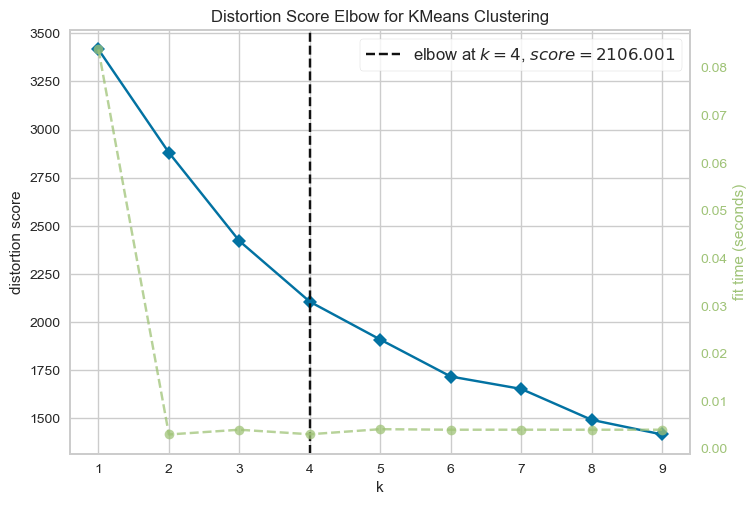

Optimal number of clusters: 4
Cluster Summary:
         Cement  BlastFurnaceSlag  ...  Components  Count
Cluster                            ...                   
0         315.0             20.00  ...         7.0     89
1         339.0              0.00  ...         5.0     83
2         199.3            182.45  ...         7.0     98
3         165.0             97.10  ...         8.0    157

[4 rows x 10 columns]


C:\Users\user\anaconda3\envs\env_mlf\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


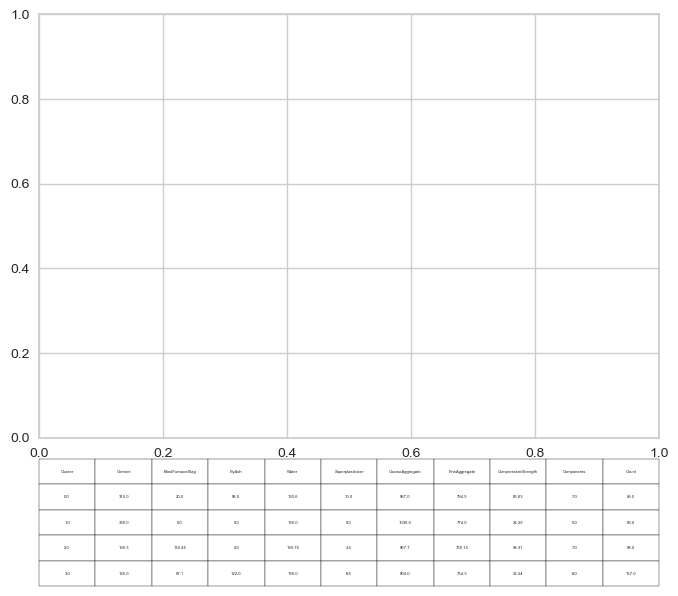

In [3]:
import pandas as pd
import pickle
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
import matplotlib.pyplot as plt

#%%
# Завантаження набору даних
with open('../datasets/mod_05_topic_10_various_data.pkl', 'rb') as fl:
    datasets = pickle.load(fl)

# Перевірка доступних даних
print("Available datasets:", datasets.keys())

# Вибір набору даних Concrete
data = datasets['concrete']
print(data.head())

#%%
# Створення нової ознаки Components
data['Components'] = data.apply(lambda row: sum(row != 0), axis=1)

# Нормалізація даних
features = data.drop(columns=['Components', 'Cluster'], errors='ignore')

scaler = StandardScaler()
normalized_data = scaler.fit_transform(features)

#%%
# Визначення оптимальної кількості кластерів
kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(1, 10))
visualizer.fit(normalized_data)
visualizer.show()

# Отримання оптимальної кількості кластерів
optimal_k = visualizer.elbow_value_
print(f"Optimal number of clusters: {optimal_k}")

#%%
# Кластеризація методом k-середніх
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
labels = kmeans.fit_predict(normalized_data)

# Додавання міток до даних
data['Cluster'] = labels

#%%
# Розрахунок описової статистики кластерів
cluster_summary = data.groupby('Cluster').median()

# Розрахунок кількості об'єктів у кожному кластері
cluster_counts = data['Cluster'].value_counts()

#%%
# Додавання кількості об'єктів до звіту
cluster_summary['Count'] = cluster_counts

# Виведення звіту
print("Cluster Summary:")
print(cluster_summary)

# Додавання таблиці
table_data = cluster_summary.reset_index()

# Додавання таблиці до графіку
table = plt.table(cellText=table_data.values,
                  colLabels=table_data.columns,
                  cellLoc='center',
                  loc='bottom',
                  bbox=[0.0, -0.35, 1.0, 0.3])
plt.show()
#%%
# Після проведення кластеризації набору даних про бетон я отримала кілька важливих результатів, які можуть допомогти глибше зрозуміти структуру даних і характеристики бетону.

# 1. Оптимальна кількість кластерів:
# За результатами методу Elbow, оптимальна кількість кластерів для нашого набору даних становить 4. Це число вказує на найкраще розподілення даних на підгрупи, забезпечуючи гарний баланс між якістю кластеризації та складністю моделі.

# 2. Склад кластерів:
# Кластер 0: 89 об'єктів, середній цемент — 315.0, шлаковий матеріал — 20.00.
# Кластер 1: 83 об'єкти, середній цемент — 339.0, шлаковий матеріал — 0.00.
# Кластер 2: 98 об'єктів, середній цемент — 199.3, шлаковий матеріал — 182.45.
# Кластер 3: 157 об'єктів, середній цемент — 165.0, шлаковий матеріал — 97.10.

# 3. Кількість об'єктів у кластерах:
# Кластер 3 має найбільшу кількість об'єктів (157), а кластер 1 — найменшу (83).

# 4. Аналіз компонентів:
# Ознака Components, яка представляє кількість ненульових значень у кожному рядку, допомогла виявити, що кластер 3 має найвищу середню кількість компонентів (8.0), що може вказувати на різні підходи до виробництва або різні типи бетону в цьому кластері.

